# 基于决策树的非线性回归模型实验
本实验将演示如何使用决策树回归模型解决非线性回归问题，包括数据读取、可视化、预处理、建模、评估及结论。

## 1. 读取数据
数据集文件名为 `simulated_data.csv`，位于当前目录。

In [1]:
import pandas as pd
df = pd.read_csv('simulated_data.csv')
df.head()

,X,y
0,0.000572,-1.349956
1,0.014352,0.014351
2,0.062780,0.062739
3,0.069758,0.069701
4,0.079106,0.079024


## 2. 可视化分析

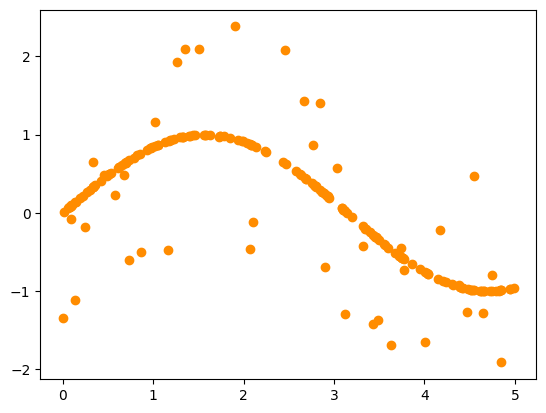

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['X'],df['y'],c='darkorange')
plt.show()

## 3. 数据预处理

In [3]:
# 划分自变量和因变量
X = df['X'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y)
X_tr.shape,X_ts.shape

((150, 1), (50, 1))

## 4. 建立决策树回归模型

In [4]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=20)
regr_1.fit(X_tr, y_tr)
regr_2.fit(X_tr, y_tr)

,criterion,'squared_error'
,splitter,'best'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


## 5. 模型预测与评估

In [5]:
y_1 = regr_1.predict(X_ts)
y_2 = regr_2.predict(X_ts)
import numpy as np
mse_1 = np.sqrt(np.mean(np.square(y_1-y_ts)))
mse_2 = np.sqrt(np.mean(np.square(y_2-y_ts)))
mse_1,mse_2

(np.float64(0.9518293093462185), np.float64(0.9865052441983452))

## 6. 预测结果可视化

C:\Users\saurl\AppData\Local\Temp\ipykernel_35352\3644458947.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_plot = np.arange(min(X),max(X),(max(X)-min(X))/100).reshape(-1,1)


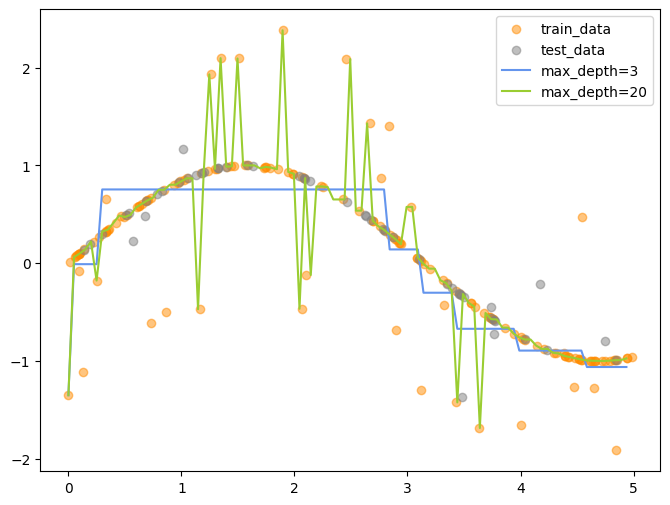

In [6]:
X_plot = np.arange(min(X),max(X),(max(X)-min(X))/100).reshape(-1,1)
y_plot_1 = regr_1.predict(X_plot)
y_plot_2 = regr_2.predict(X_plot)
plt.figure(figsize=(8,6))
plt.scatter(X_tr,y_tr,c='darkorange',alpha=0.5,label='train_data')
plt.scatter(X_ts,y_ts,c='gray',alpha=0.5,label='test_data')
plt.plot(X_plot,y_plot_1,'cornflowerblue',label='max_depth=3')
plt.plot(X_plot,y_plot_2,'yellowgreen',label='max_depth=20')
plt.legend()
plt.show()

## 7. 实验结论
1. 决策树回归可以通过调整“最大树深度”来调整拟合效果。
2. 最大树深度为3，测试集MSE请见上方输出。
3. 最大树深度为20，测试集MSE请见上方输出。
4. 本试验中，最大树深度为20时，存在过拟合。